# Unsupervised Learning Project: Customer Segmentation

This project was completed as part of Predictive Machine Learning Unit, Masters of Business Analytics, Macquarie University. 

## Background
A travel agency faces challenge in understanding customer behaviours and preferences. This report presents a customer segmentation analysis to inform marketing strategies tailored to distinct demographic and socio-economic groups.

The dataset is provided by the travel agency, consisting information of 2,000 customers, collected through their bookings and interactions with the agency. The dataset includes variables such as customer age, gender, annual income, etc.

We will first explore the summary statistics of the dataset consists through exploratory data analysis. Next, we apply unsupervised machine learning (classification) techniques: K-means++ and Agglomerative Clustering to segment the dataset, clustering customers based on shared attributes. Finally, the report provides tailored marketing strategies and tactics for each segment, to improve customer engagement and optimize marketing effectiveness.

---
##  Import and Understand Dataset

In [532]:
# import dataset

import pandas as pd
import numpy as np 

df = pd.read_csv('data/data.csv')
df_legend = pd.read_csv('data/data legend.csv')

In [535]:
# Understand data.csv

print(df.nunique())
print(df.isnull().sum())
print(df.dtypes)
df.head()

Gender                2
Marital Status        2
Age                  51
Education             4
Income             1988
Occupation            3
Settlement Size       3
dtype: int64
Gender             0
Marital Status     0
Age                0
Education          0
Income             0
Occupation         0
Settlement Size    0
dtype: int64
Gender             int64
Marital Status     int64
Age                int64
Education          int64
Income             int64
Occupation         int64
Settlement Size    int64
dtype: object


,Gender,Marital Status,Age,Education,Income,Occupation,Settlement Size
0,1,1,39,2,130568,1,2
1,0,0,29,1,80315,0,0
2,1,0,35,0,107067,0,0
3,0,1,56,2,214000,1,0
4,1,1,45,2,158138,1,2


In [537]:
# Understand data legend.csv

df_legend.head(30)

,Variable,Range,Description
0,NaN,NaN,NaN
1,Gender,"{0,1}",Biological sex (gender) of a customer. In this...
2,NaN,0,male
3,NaN,1,female
4,NaN,NaN,NaN
5,Marital Status,"{0,1}",Marital status of a customer.
6,NaN,0,single
7,NaN,1,non-single (divorced / separated / married / w...
8,NaN,NaN,NaN
9,Age,NaN,"The age of the customer in years, calculated a..."


---
##  Exploratory Data Analysis 

We will present key statistics for each variable and explore how they relate to one another. This approach will provide insights into customer demographics: gender, age, marital status, annual income, education, occupation, and settlement size.

In [538]:
import seaborn as sns
import matplotlib.pyplot as plt

In [539]:
df.describe().round(2)

,Gender,Marital Status,Age,Education,Income,Occupation,Settlement Size
count,2000.00,2000.0,2000.00,2000.00,2000.00,2000.00,2000.00
mean,0.60,0.5,40.82,1.46,137516.20,0.61,0.83
std,0.49,0.5,9.46,0.78,46184.30,0.67,0.97
min,0.00,0.0,20.00,0.00,35832.00,0.00,0.00
25%,0.00,0.0,33.00,1.00,101262.75,0.00,0.00
50%,1.00,1.0,40.00,1.00,133004.00,1.00,0.00
75%,1.00,1.0,48.00,2.00,171232.50,1.00,2.00
max,1.00,1.0,76.00,3.00,309364.00,2.00,2.00


Gender and marital status distribution is balanced with 60% females and 50% single individuals.

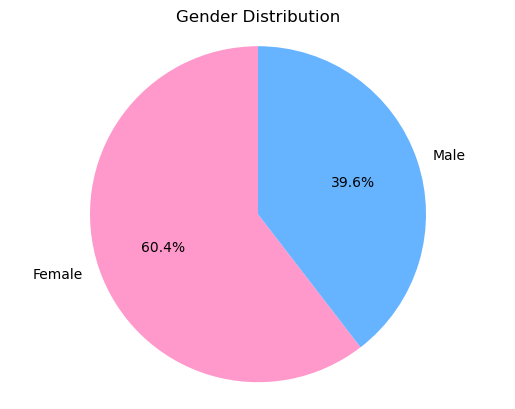

In [543]:
# Gender Distribution

# Count the occurrences of each gender
gender_counts = df['Gender'].value_counts()

# Define colors and labels
colors = ['#ff99cc','#66b3ff'] 
labels = ['Male' if gender == 0 else 'Female' for gender in gender_counts.index]

# Plot pie chart with defined colors, labels, title
plt.pie(gender_counts, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors)
plt.title('Gender Distribution')
plt.axis('equal') 

plt.show()

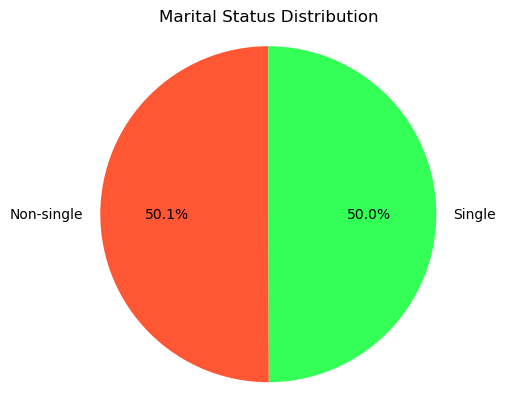

In [544]:
# Marital Distribution

# Count the occurrences of each gender
marital_counts = df['Marital Status'].value_counts()

# Define colors and labels
colors = ['#ff5733', '#33ff57']  
labels_marital = ['Single' if status == 0 else 'Non-single' for status in marital_counts.index]

# Plot pie chart with defined colors, labels, title
plt.pie(marital_counts, labels=labels_marital, autopct='%1.1f%%', startangle=90, colors=colors)
plt.title('Marital Status Distribution')
plt.axis('equal')  

plt.show()

Customers' ages range from 20 to 76, with the median age of 40 years. The distribution is right-skewed, suggesting that customers are more concentrated between age 25-40.

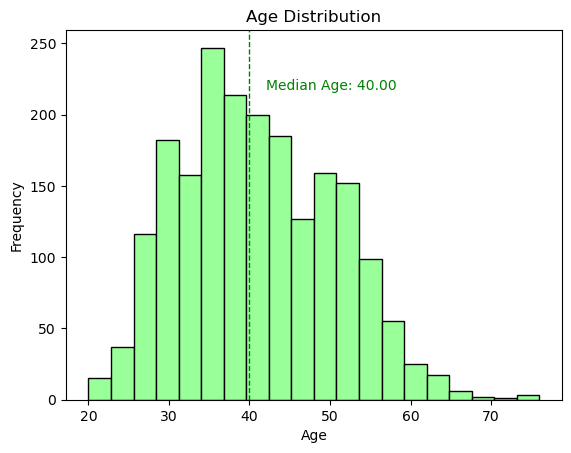

In [545]:
# Age Distribution

# Plot histogram for 'Age' column
plt.hist(df['Age'], bins=20, color='#99ff99', edgecolor='black')

# Add titles and labels
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')

# Add median line
average_age = df['Age'].median()
plt.axvline(average_age, color='green', linestyle='dashed', linewidth=1)
plt.text(average_age + 2, 220, f'Median Age: {average_age:.2f}', color='green', 
         verticalalignment='center', horizontalalignment='left', fontsize=10)

plt.show()

Annual income ranges from 36K to 309K, with a right-skewed distribution and a few high-income outliers shown. Over 75% customers earn above 100K, with average income of 138K.

Customers mainly have high school or university degrees, and those with higher education generally correlates with higher income. This indicates that travel products consumers are likely well-educated, higher-income individuals.

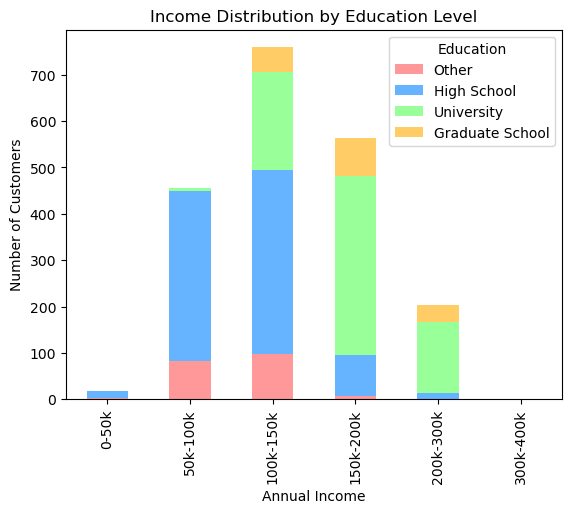

In [548]:
# Income Distribution by Education Level - Stacked Bar Chart

# Group income by education level
income_by_education = pd.cut(df['Income'], bins=[0, 50000, 100000, 150000, 200000, 300000, 400000],
                             labels=['0-50k', '50k-100k', '100k-150k', '150k-200k', '200k-300k', '300k-400k'])

# Define Education level labels for the plot
education_labels = ['Other', 'High School', 'University', 'Graduate School']

# Calculate crosstab of income ranges and Education  
income_education_cross = pd.crosstab(income_by_education, df['Education'])

# Plot stacked bar chart 
income_education_cross.plot(kind='bar', stacked=True, color=['#ff9999', '#66b3ff', '#99ff99', '#ffcc66'])
plt.title('Income Distribution by Education Level')
plt.xlabel('Annual Income')
plt.ylabel('Number of Customers')
plt.legend(education_labels, title='Education')

plt.show()

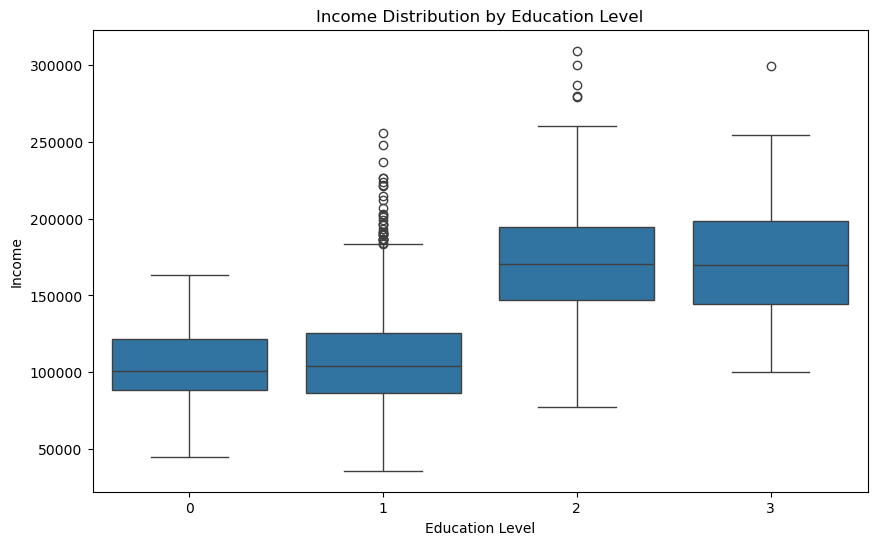

In [268]:
# Income Distribution by Education Level - Boxplot

# Create the box plot
plt.figure(figsize=(10,6))
sns.boxplot(x='Education', y='Income', data=df)

# Add titles and labels
plt.title('Income Distribution by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Income')

# Show the plot
plt.show()

From an occupational perspective, half of consumers (49.6%) are either unemployed or in unskilled roles, while 39.6% are in skilled positions. The smallest proportion of individuals (10.8%) occupy management or self-employed roles.

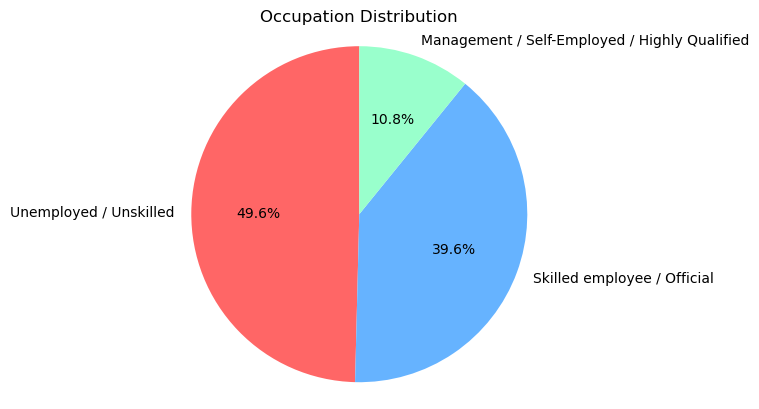

In [549]:
# Occupation Distribution

# Count the occurrences of each occupation
occupation_counts = df['Occupation'].value_counts()

# Define colors and labels
colors = ['#ff6666', '#66b3ff', '#99ffcc'] 
labels = ['Unemployed / Unskilled' if occupation == 0 else 
          'Skilled employee / Official' if occupation == 1 else 
          'Management / Self-Employed / Highly Qualified' 
          for occupation in occupation_counts.index]

# Plot the pie chart with defined colors, labels, and legend
plt.pie(occupation_counts, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors)
plt.title('Occupation Distribution')
plt.axis('equal')  

plt.show()

Geographically, over 50% of customers reside in small cities, 40% in mid-sized cities, and less than 10% in big cities. Interestingly, small city residents have higher average income (115K) than those in mid-sized cities (97K), despite mid-sized cities should offer more opportunities.

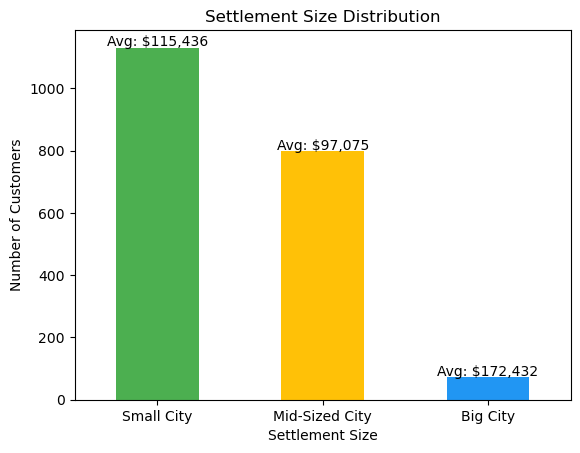

In [553]:
# Settlement Distribution

# Calculate average income for each settlement size
average_income_by_settlement = df.groupby('Settlement Size')['Income'].mean()

# Plot the distribution of Settlement Size and define color 
settlement_size_counts = df['Settlement Size'].value_counts()
colors = ['#4CAF50', '#FFC107', '#2196F3']

# Bar chart
settlement_size_counts.plot(kind='bar', color=colors)
plt.title('Settlement Size Distribution')
plt.xlabel('Settlement Size')
plt.ylabel('Number of Customers')
plt.xticks([0, 1, 2], ['Small City', 'Mid-Sized City', 'Big City'], rotation=0)

# Add average income annotations above bars
for index, value in enumerate(settlement_size_counts):
    plt.text(index, value + 5, f'Avg: ${average_income_by_settlement[index]:,.0f}', 
             ha='center', color='black', fontsize=10)

plt.show()

Below is a correlation heatmap between variables, revealing a few key insights:

- Marital status is a strong predictor, showing consistently high correlations with other variables, whereas gender shows overall low correlations.
- Older customers generally have higher incomes (corelation = 1)
- Higher education and living in larger cities are associated with more advanced occupations

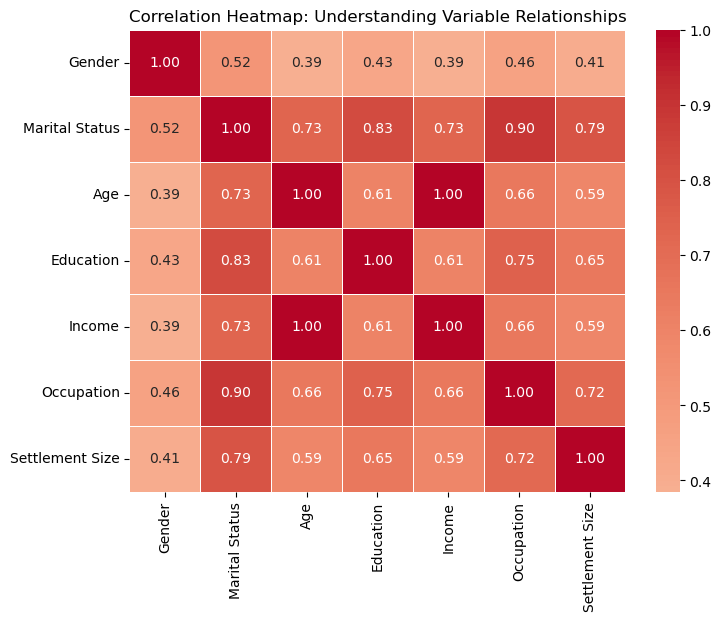

In [555]:
# Correlation heatmap for varaibles 

# Calculate the correlation matrix
corr = df.corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, center=0)
plt.title('Correlation Heatmap: Understanding Variable Relationships')

plt.show()

---
##  Customer Segmentation 

### Methodology

To begin the segmentation, we first standardized the numerical data (age and income) to ensure data quality when analysing customer profiles. Once the data was adjusted, we identified the optimal number of clusters and applied two proven clustering techniques in machine learning — K-means++ and Agglomerative Clustering (AC) — to identify two distinct customer segments.

In [556]:
from sklearn.preprocessing import StandardScaler
from matplotlib import cm
from sklearn.metrics import silhouette_samples
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering

**Step 1: Standize the numerical variables**

Using Sklearn's Standard Scaler, Age and Income will be standardised to avoid overpowering the other categorical variables during the segmentation. The scaled dataset will be use for further analysis.

In [557]:
# Standardise the numeric data

df_scale = df.copy()

sc = StandardScaler()

# Fit and transform only the selected columns ('Age' and 'Income')
df_scale[['Age', 'Income']] = sc.fit_transform(df_scale[['Age', 'Income']])

df_scale

,Gender,Marital Status,Age,Education,Income,Occupation,Settlement Size
0,1,1,-0.192892,2,-0.150483,1,2
1,0,0,-1.250703,1,-1.238852,0,0
2,1,0,-0.616016,0,-0.659462,0,0
3,0,1,1.605387,2,1.656471,1,0
4,1,1,0.441795,2,0.446623,1,2
...,...,...,...,...,...,...,...
1995,0,0,-0.827579,1,-0.814013,0,0
1996,1,1,0.124451,2,0.126759,1,2
1997,1,1,0.124451,2,0.151514,1,2
1998,1,0,-1.144922,1,-1.092532,0,0


**Step 2: Find the optimal Number of Clustering**

We will use Elbow Method to find the optimal number of custers before proceeding to segmenting the groups. The result will be verfied by silhouette coeficients

Results from the elbow method shows cluster 2 is the most sufficient segmentation because, at this point, the rate of decrease in the within-cluster sum of squares significantly slows down, forming an "elbow" shape on the graph. Adding more clusters beyond this point provides diminishing returns in terms of improving cluster compactness

Silhouette coefficients verifies that 2 is the optimal number of clusters. The silhouette plots show the performance of modelling algorithms for different cluster sizes, with average silhouette scores of 0.54 (2 clusters), 0.43 (3 clusters), and 0.45 (4 clusters). 2 clusters has the highest silhouette score, indicating well-separated and appropriately grouped clusters. As the number of clusters increases to 3, the score decrease and irregularity of clusters increase, indicating over-clustering and decreased grouping quality. 


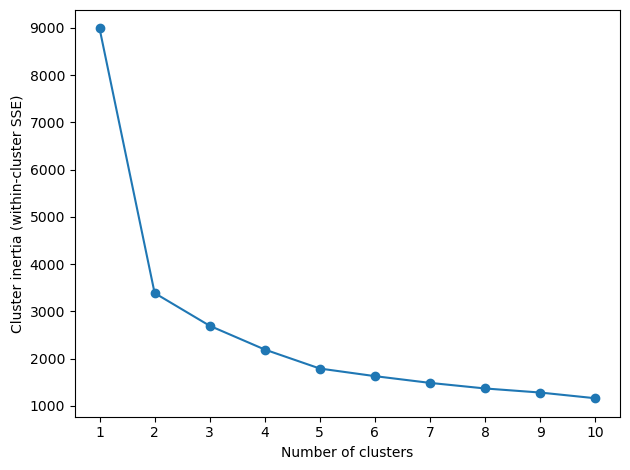

In [558]:
# Elbow Method 

inertias = [] # empty list

for i in range(1, 11):
    km = KMeans(n_clusters=i, 
                init='k-means++', 
                n_init=10, 
                max_iter=300, 
                random_state=0)
    km.fit(df_scale)
    inertias.append(km.inertia_)

plt.plot(range(1, 11), inertias, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Cluster inertia (within-cluster SSE)')
plt.xticks(range(1,11))
plt.tight_layout()
#plt.savefig('images/11_03.png', dpi=300)
plt.show()

silhouette_avg: 0.54


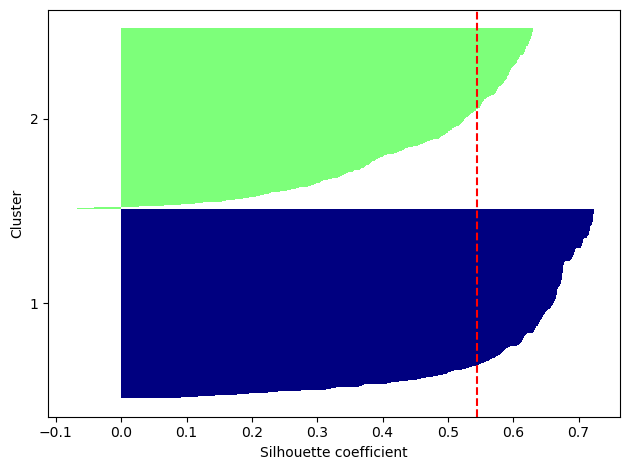

In [559]:
# three appropriately chosen Silhouette Plots

# Silhouette Plots when Cluster n = 2
km = KMeans(n_clusters=2,  
            init='k-means++', 
            n_init=10, 
            max_iter=300,
            tol=1e-04,
            random_state=0)

y_km = km.fit_predict(df_scale)
# print(y_km)

cluster_labels = np.unique(y_km)
# print(cluster_labels)

n_clusters = cluster_labels.shape[0]

silhouette_vals = silhouette_samples(df_scale, y_km, metric='euclidean')
# print('silhouette_vals\n', silhouette_vals)

## ------- plotting silhouette values -------

y_ax_lower, y_ax_upper = 0, 0
yticks = []

for i, c in enumerate(cluster_labels):
    c_silhouette_vals = silhouette_vals[y_km == c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    color = cm.jet(float(i) / n_clusters)
    plt.barh(range(y_ax_lower, y_ax_upper), c_silhouette_vals, height=1.0, edgecolor='none', color=color)
    yticks.append((y_ax_lower + y_ax_upper) / 2.)
    y_ax_lower += len(c_silhouette_vals)
    
    
silhouette_avg = np.mean(silhouette_vals)
print(f'silhouette_avg: {silhouette_avg:.2f}')

plt.axvline(silhouette_avg, color="red", linestyle="--") # plot vertical average line

plt.yticks(yticks, cluster_labels + 1)
plt.ylabel('Cluster')
plt.xlabel('Silhouette coefficient')

plt.tight_layout()
plt.show()

silhouette_avg: 0.43


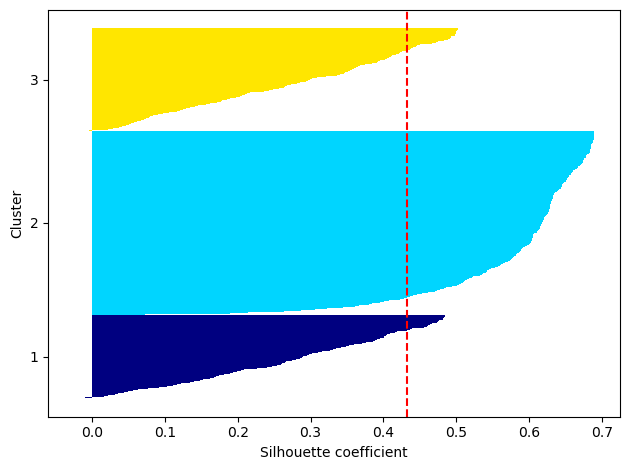

In [560]:
# Silhouette Plots when Cluster n = 3

km = KMeans(n_clusters=3,  
            init='k-means++', 
            n_init=10, 
            max_iter=300,
            tol=1e-04,
            random_state=0)

y_km = km.fit_predict(df_scale)
# print(y_km)

cluster_labels = np.unique(y_km)
# print(cluster_labels)

n_clusters = cluster_labels.shape[0]

silhouette_vals = silhouette_samples(df_scale, y_km, metric='euclidean')
# print('silhouette_vals\n', silhouette_vals)

## ------- plotting silhouette values -------

y_ax_lower, y_ax_upper = 0, 0
yticks = []

for i, c in enumerate(cluster_labels):
    c_silhouette_vals = silhouette_vals[y_km == c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    color = cm.jet(float(i) / n_clusters)
    plt.barh(range(y_ax_lower, y_ax_upper), c_silhouette_vals, height=1.0, edgecolor='none', color=color)
    yticks.append((y_ax_lower + y_ax_upper) / 2.)
    y_ax_lower += len(c_silhouette_vals)
    
    
silhouette_avg = np.mean(silhouette_vals)
print(f'silhouette_avg: {silhouette_avg:.2f}')

plt.axvline(silhouette_avg, color="red", linestyle="--") # plot vertical average line

plt.yticks(yticks, cluster_labels + 1)
plt.ylabel('Cluster')
plt.xlabel('Silhouette coefficient')

plt.tight_layout()
plt.show()

silhouette_avg: 0.45


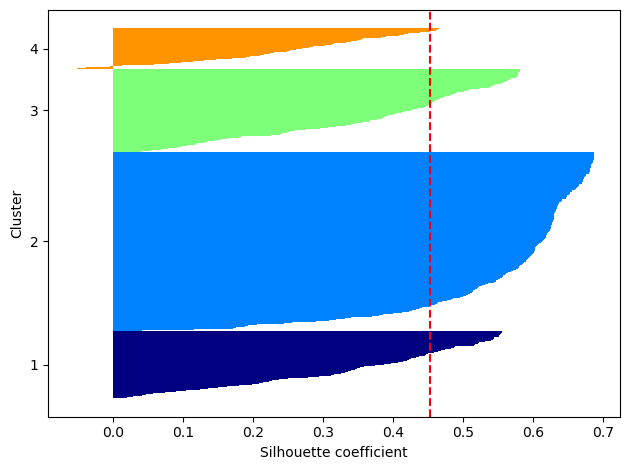

In [561]:
# Silhouette Plots when Cluster n = 4

km = KMeans(n_clusters=4,  
            init='k-means++', 
            n_init=10, 
            max_iter=300,
            tol=1e-04,
            random_state=0)

y_km = km.fit_predict(df_scale)
# print(y_km)

cluster_labels = np.unique(y_km)
# print(cluster_labels)

n_clusters = cluster_labels.shape[0]

silhouette_vals = silhouette_samples(df_scale, y_km, metric='euclidean')
# print('silhouette_vals\n', silhouette_vals)

## ------- plotting silhouette values -------

y_ax_lower, y_ax_upper = 0, 0
yticks = []

for i, c in enumerate(cluster_labels):
    c_silhouette_vals = silhouette_vals[y_km == c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    color = cm.jet(float(i) / n_clusters)
    plt.barh(range(y_ax_lower, y_ax_upper), c_silhouette_vals, height=1.0, edgecolor='none', color=color)
    yticks.append((y_ax_lower + y_ax_upper) / 2.)
    y_ax_lower += len(c_silhouette_vals)
    
    
silhouette_avg = np.mean(silhouette_vals)
print(f'silhouette_avg: {silhouette_avg:.2f}')

plt.axvline(silhouette_avg, color="red", linestyle="--") # plot vertical average line

plt.yticks(yticks, cluster_labels + 1)
plt.ylabel('Cluster')
plt.xlabel('Silhouette coefficient')

plt.tight_layout()
plt.show()

**Step 3(A): Estimating Clusters Using K-means++**  

Now we use use K-means++ to group customers to cluster 0 and 1, as suggested n cluster = 2 from the previous section.

The result is shown by a cluster summary which include the clustering centre for each variable and number of customers in each segment.

In [562]:
km_plus = KMeans(n_clusters=2, 
            init='k-means++', 
            n_init=10,      # run 10 times with different random centroids to choose the final model with the lowest SSE
            max_iter=300,   # max number of iterations for each run
            random_state=0)

y_km_plus = km_plus.fit_predict(df_scale)

print(y_km_plus)
print(f'\nClusters:\n {km_plus.cluster_centers_}')

[1 0 0 ... 1 0 1]

Clusters:
 [[ 0.36523437  0.03222656 -0.74152809  0.84082031 -0.74198733  0.0390625
   0.0703125 ]
 [ 0.85553279  0.99180328  0.77799668  2.10245902  0.77847851  1.21413934
   1.6352459 ]]


In [566]:
# Create a dataframe that contains columns of all variables and each row's associated 'KMeans Cluster'

df_km = df.copy()
df_km['KMeans Cluster'] = y_km_plus

df_km.head()

,Gender,Marital Status,Age,Education,Income,Occupation,Settlement Size,KMeans Cluster
0,1,1,39,2,130568,1,2,1
1,0,0,29,1,80315,0,0,0
2,1,0,35,0,107067,0,0,0
3,0,1,56,2,214000,1,0,1
4,1,1,45,2,158138,1,2,1


In [564]:
# KMeans Cluster Summary 

# Get KMeans cluster centers for each variable
kmeans_centers = df_km.groupby('KMeans Cluster')[df_scale.columns].mean()


# Get the number of customers for each cluster
kmeans_counts = df_km['KMeans Cluster'].value_counts().sort_index()  # Cluster labels from the KMeans model
kmeans_centers['Number of Customers'] = kmeans_counts.values

kmeans_centers

,Gender,Marital Status,Age,Education,Income,Occupation,Settlement Size,Number of Customers
KMeans Cluster,,,,,,,,
0,0.365234,0.032227,33.813477,0.840820,103256.601562,0.039062,0.070312,1024
1,0.855533,0.991803,48.178279,2.102459,173460.689549,1.214139,1.635246,976


Using K-means ++, the following customer profiles can be identified:

- Emerging Workers (51%) are likely young, single male adults aged around 34; unemployed or in unskilled jobs, with lower incomes around 103K, a high school education and living in smaller cities.
- Established Achievers (49%) are likely mature non-single females aged around 48, in skilled or official positions with university education level and high income at average 173K. They live in mid to larger metropolitan areas.

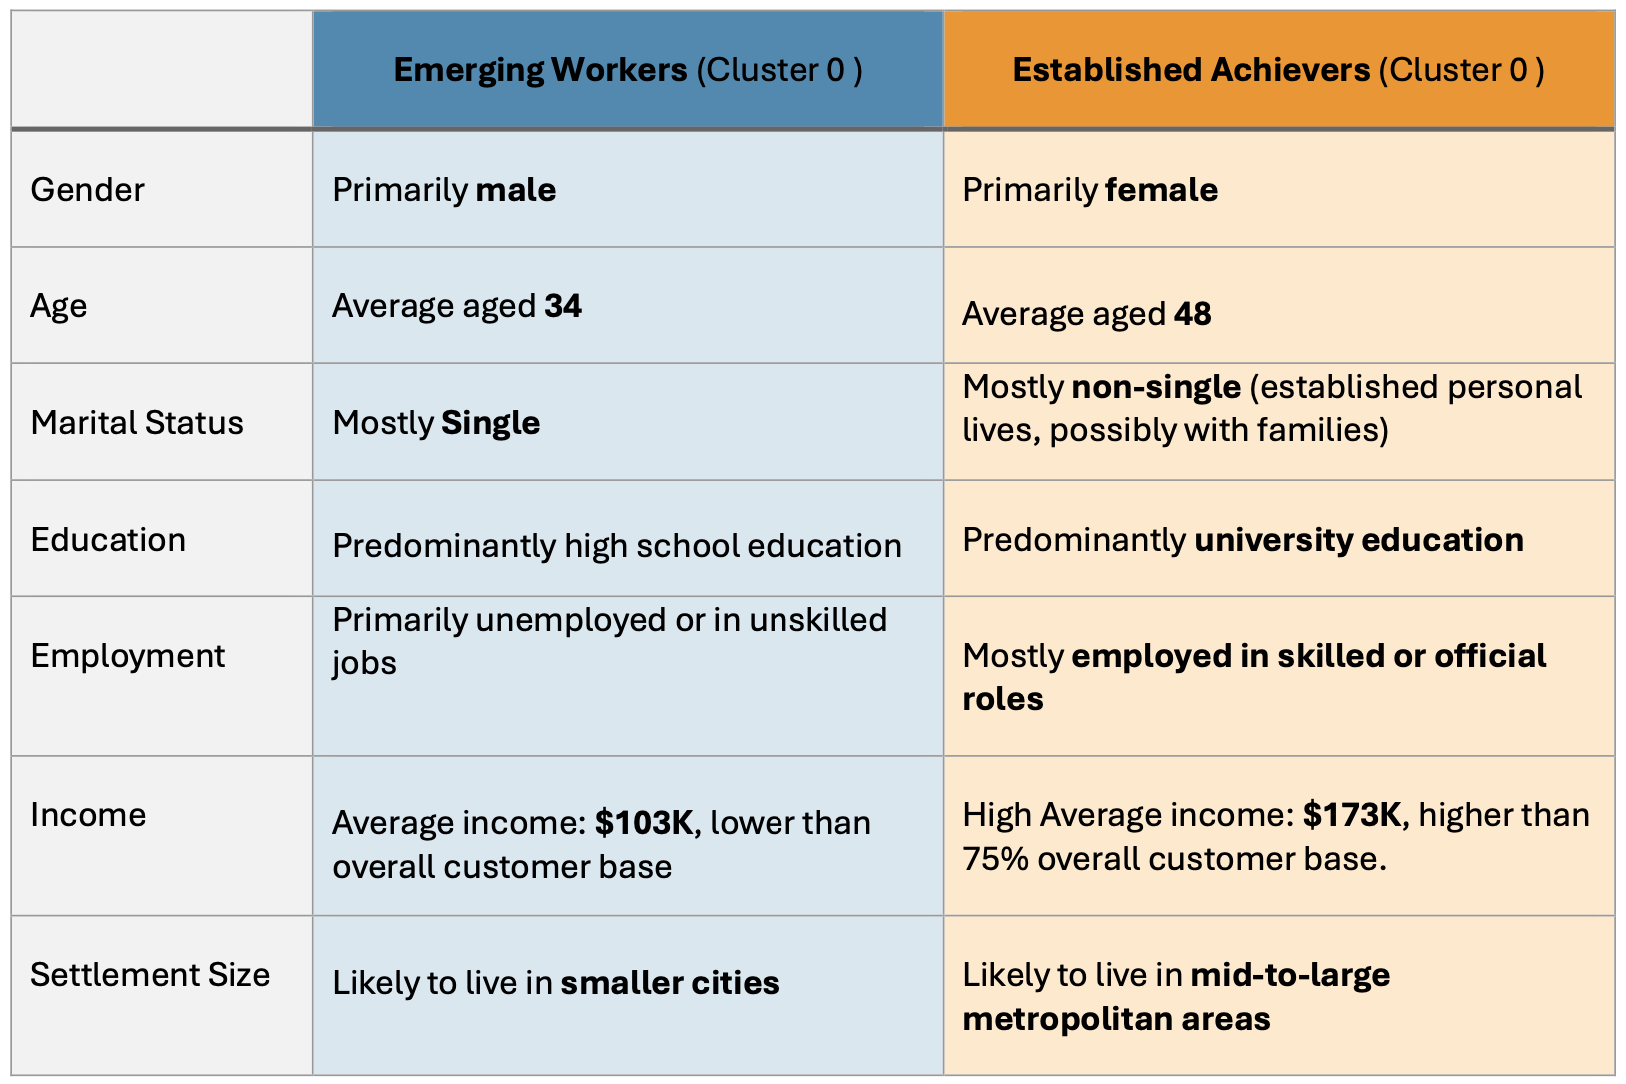

**Step 3(B): Estimating Clusters Using Agglomerative Clustering techniques**  

Now we use Agglomerative Clustering techniques to group customers to cluster 0 and 1, as suggested n cluster = 2 from the previous section.

The result is shown by a cluster summary which include the clustering centre for each variable and number of customers in each segment.

Using Cluster Summary from K-means++ and Agglomerative Clustering techniques, we can identify the two segment's demographics and explore their characterististics to inform marketing decision.

In [450]:
ac = AgglomerativeClustering(n_clusters=2, 
                             metric='euclidean', 
                             linkage='complete')
y_ac = ac.fit_predict(df_scale)
y_ac = 1 - y_ac  #swap cluster label between 0 and 1 to match with k-means++
print('Cluster labels: %s' % y_ac)

Cluster labels: [1 0 0 ... 1 0 1]


In [567]:
# Create a dataframe that contains columns of all variables and each row's associated 'AC Cluster'

df_ac = df.copy()
df_ac['AC Cluster'] = y_ac 

df_ac.head()

,Gender,Marital Status,Age,Education,Income,Occupation,Settlement Size,AC Cluster
0,1,1,39,2,130568,1,2,1
1,0,0,29,1,80315,0,0,0
2,1,0,35,0,107067,0,0,0
3,0,1,56,2,214000,1,0,1
4,1,1,45,2,158138,1,2,1


In [569]:
# Agglomerative Clustering techniques Cluster Summary 

# Get AC cluster centers for each variable
ac_centers = df_ac.groupby('AC Cluster')[df_scale.columns].mean()

# Get the number of customers for each cluster
ac_counts = df_ac['AC Cluster'].value_counts().sort_index()  # Cluster labels from the KMeans model
ac_centers['Number of Customers'] = ac_counts.values

ac_centers

,Gender,Marital Status,Age,Education,Income,Occupation,Settlement Size,Number of Customers
AC Cluster,,,,,,,,
0,0.367981,0.005974,32.129032,0.805257,95041.150538,0.013142,0.069295,837
1,0.774721,0.856406,47.080825,1.925193,168085.081685,1.043852,1.384351,1163


Using Agglomerative Clustering, the following customer profiles can be identified:

- Emerging Workers (42%) are primarily younger single males aged around 32, who are unemployed or in unskilled jobs, with relatively low income at around 95K and educated to high school level, residing in smaller cities.
- Established Achievers (58%) are mainly mature (avg age 47), high income at around 168K and university-level educated females, employed in skilled roles, non-single and live in mid-sized cities.

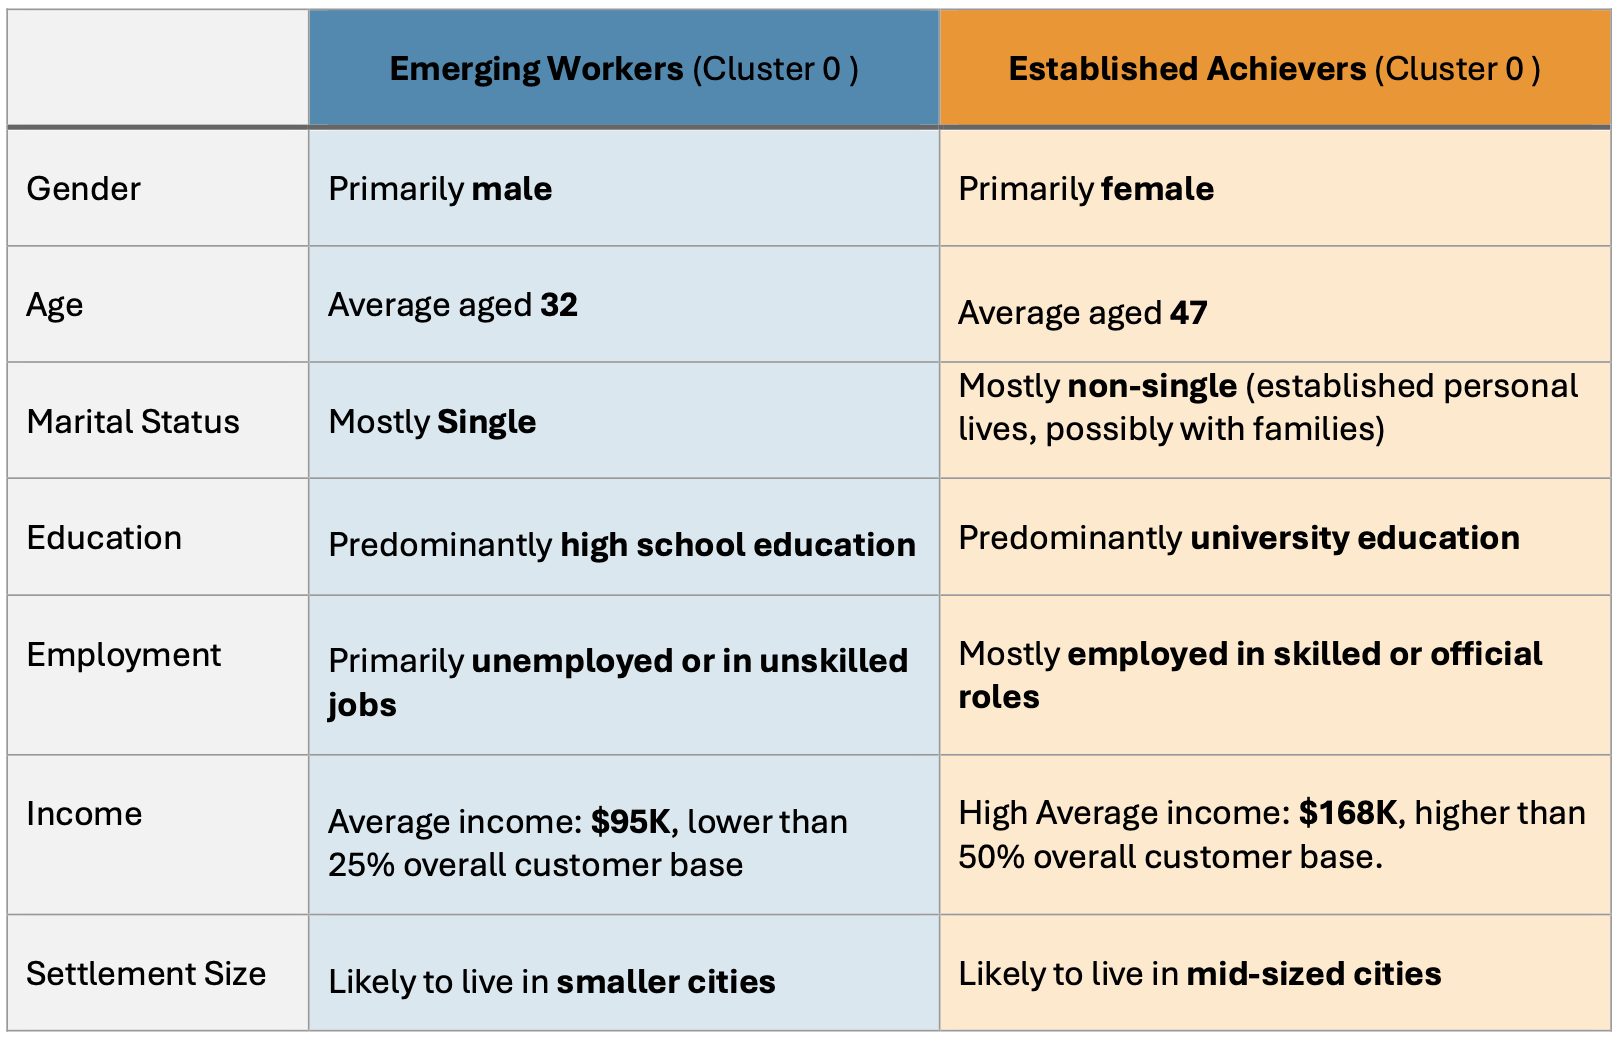


---
## Overall Customer Profile
Both clustering methods show significant overlap in customer profiles. Emerging Workers are predominantly young males, with lower incomes and less education, residing in smaller cities. In contrast, Established Achievers are mature females, with higher incomes, extensive work experience, and higher education, typically living in mid to large cities.

The primary differences between the two techniques lie in the distribution of customers and slight variations in income and age. K-means++ identifies a slightly larger proportion of Emerging Workers. It reports higher average incomes and ages for both segments with the gaps with AC being 5K-8K and less than 2 years respectively. Despite these minor discrepancies, both techniques align on fundamental customer profiles, and the behavioural traits remain consistent.

---
## Recommendation for Marketing

### Emerging Workers: Affordable and Unforgettable
To attract Emerging Workers, marketing strategy focusing on affordability and unique experiences is recommended. Suggested tactics include:
1. Influencer-Curated Holidays: Collaborate with micro-influencers to design personalized holiday packages that appeal to their niche audience. Offer a once-in-a-lifetime opportunity to travel with the influencer, leveraging their credibility to boost engagement and word-of-mouth among younger audience.
2. Bachelor Tour Package: Offer travel opportunities aimed at socializing and meeting new people, which include group and themed activities, creating an engaging environment for singles and youngsters to connect beyond online apps.
3. Flexible Payment Plans: Provide flexible payment options, such as instalment or “buy now, pay later” options to make larger trips accessible to consumers with limited disposable income.
4. Last-Minute Promotions: Promote exclusive offers on "last-minute deals" and "group discounts" on social media to create urgency and encourage savings while traveling.

### Established Achievers: Exclusive and Family-Friendly
For Established Achievers, marketing strategy is recommended to focus on premium experiences, quality, and convenience. Suggested tactics include:
1. Luxury Family Travel: Offer vacation packages for couples and families, featuring luxurious amenities like private villas and nanny services, to provide a high-end, relaxing experience, alleviating the burden of daily chores and allowing parents, grandparents, or partners to unwind fully.
2. Exclusive Event Invitations: Invite this career-driven segment to VIP luxury travel webinars and exclusive events that offer networking opportunities, highlighting prestige of the agency.
3. Personalized Email Campaigns: Use tailored emails as key communication tool with exclusive offers, ensuring messages and recommendations are customised to their interests to drive engagement.


## Conclusion

In conclusion, this report presents a customer segmentation analysis for a travel agency. Using demographic data from 2,000 customers and machine learning techniques (K-means++ and Agglomerative Clustering) to identify two key segments: Emerging Workers (younger, lower-income males) and Established Achievers (older, higher-income females).

Key insights reveal Tailored strategies focusing on affordability for Emerging Workers and premium, family-friendly options for Established Achievers are recommended.

While the customer profile provides insights in tailoring marketing strategies, there’s a need for further behavioural analysis for each segment. Understanding these drivers will enable the agency to craft more relevant offers that foster customer loyalty and drive long-term growth.